##Enfermedad Tiroides
Este dataset contiene información acerca de pacientes con posible enfermedad de tiroides, contiene información general del paciente, como edad y sexo, y también contiene los valores de las hormonas de cada paciente relacionadas con la tiroides. Al final incluye una columna Target que indica el diagnóstico de la persona.

Este dataset se obtuvo de Keagle:
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data/data

## Limpieza y análisis exploratorio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar dataset original
df =pd.read_csv("/content/thyDF.csv")


In [ ]:
# Lectura del raw dataset
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
# dimensiones del dataframe
df.shape

(9172, 31)

De acuerdo a la función anterior podemos notar que existen 30 columnas y 9172 registros, procederemos a eliminar las columnas que no aportan de manera significativa a la implementación de nuestros algoritmos de ML.



In [ ]:
# Datos inconclusos de referral_source
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [ ]:
# dropeo de columnas
df_dropped = df.drop(columns=["query_on_thyroxine", "thyroid_surgery","query_hypothyroid","query_hyperthyroid","T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured", "referral_source", "tumor", "TSH_measured" ])

Se eliminaron las siguientes columnas:

- "query_on_thyroxine" -> Debido a que es ambigua la información de la columna
- "thyroid_surgery" -> No brinda información relevante
- "query_hypothyroid" -> La información es bastante subjetiva para el análisis
- "query_hyperthyroid" -> La información es subjetvia para el análisis
- "T3_measured" -> La columna es redundante con la columna T3
- "Tumor" -> No relevante para los algoritmos de ML
- "TT4_measured" -> TT4 puede reemplazar la información dada por esta columna
- "T4U_measured" -> No relevante para el análisis
- "TSH_measured" -> Redundante para la columna TSH
- "T4U" -> T4U es consecuente de cambios en TT4 por eso no aporta al análisis.
- "FTI_measured" -> FTI contribuye con mayor información
- "TBG_measured" -> TBG es de mayor relevancia
- "referral_source" -> la información del dataset acerca de esta columna es inconclusa

Ya que los tipos de datos arrojados por la función no coinciden con los descritos por el dataset, es necesario hacer transformación de columnas. En primer lugar, convertimos los datos que contengan f a 0 y t a 1

In [ ]:
# reemplazamos las columnas con valores 0 y 1
df_dropped[['on_thyroxine','on_antithyroid_meds','sick','pregnant', 'I131_treatment','lithium','goitre', 'hypopituitary','psych']] = df_dropped[['on_thyroxine','on_antithyroid_meds','sick','pregnant', 'I131_treatment','lithium','goitre', 'hypopituitary','psych']].replace({'f': 0, 't': 1})

In [ ]:
# reemplazamos los dashes por 0 en la columna target
df_dropped['target'] = df_dropped['target'].replace('-', "NA")

In [ ]:
# Número de columnas después del dropeo
df_dropped.shape[1]

19

In [ ]:
# Analizamos los tipos de datos que representa cada columna
df_dropped.dtypes

age                      int64
sex                     object
on_thyroxine             int64
on_antithyroid_meds      int64
sick                     int64
pregnant                 int64
I131_treatment           int64
lithium                  int64
goitre                   int64
hypopituitary            int64
psych                    int64
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                  object
patient_id               int64
dtype: object

In [ ]:
df_dropped

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,I131_treatment,lithium,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,patient_id
0,29,F,0,0,0,0,0,0,0,0,0,0.3,NaN,NaN,NaN,NaN,NaN,NA,840801013
1,29,F,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,NaN,NaN,NaN,NA,840801014
2,41,F,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,11.0,NA,840801042
3,36,F,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,26.0,NA,840803046
4,32,F,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,0,0,0,0,0,0,0,0,0,NaN,NaN,64.0,0.83,77.0,NaN,NA,870119022
9168,22,M,0,0,0,0,0,0,0,0,0,NaN,NaN,91.0,0.92,99.0,NaN,NA,870119023
9169,69,M,0,0,0,0,0,0,0,0,0,NaN,NaN,113.0,1.27,89.0,NaN,I,870119025
9170,47,F,0,0,0,0,0,0,0,0,0,NaN,NaN,75.0,0.85,88.0,NaN,NA,870119027


In [ ]:
# Revisamos la cantidad de valores NaN en cada columna
df_dropped.isna().sum()


age                       0
sex                     307
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
I131_treatment            0
lithium                   0
goitre                    0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                    0
patient_id                0
dtype: int64

In [ ]:
# Eliminamos los valores NaN de la columna sexo
df_dropped = df_dropped.dropna(subset=['sex'])
df_dropped = df_dropped.reset_index(drop=True)

In [ ]:
# Eliminamos los valores NaN de la columna TSH y TT4
df_dropped = df_dropped.dropna(subset=['TSH', 'TT4'])
df_dropped = df_dropped.reset_index(drop=True)

In [ ]:
df_dropped.isna().sum()

age                       0
sex                       0
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
I131_treatment            0
lithium                   0
goitre                    0
hypopituitary             0
psych                     0
TSH                       0
T3                     1878
TT4                       0
T4U                     343
FTI                     340
TBG                    7974
target                    0
patient_id                0
dtype: int64

Debido a que la mayoría de registros con el nivel de TBG no es numérico y no puede ser reemplazado por ceros, se decide eliminar.

In [ ]:
df_dropped = df_dropped.drop(columns='TBG')

De acuerdo al análisis exploratorio de valores máximos y medias en diferentes columnas, se puede notar que existen valores atípicos. Por ende se requiere eliminarlos, para el correcto procesamiento de datos.

In [ ]:
df_dropped[['age','TSH','T3','TT4','T4U','FTI']].describe()

,age,TSH,T3,TT4,T4U,FTI
count,7995.000000,7995.000000,6117.000000,7995.000000,7652.000000,7655.000000
mean,77.505066,5.134091,1.950450,108.560808,0.977814,112.885884
std,1268.078427,23.802051,0.868536,37.174829,0.198786,36.965321
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000
25%,38.000000,0.445000,1.500000,88.000000,0.860000,94.000000
50%,56.000000,1.400000,1.900000,104.000000,0.960000,109.000000
75%,68.000000,2.700000,2.300000,126.000000,1.062500,128.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,642.000000


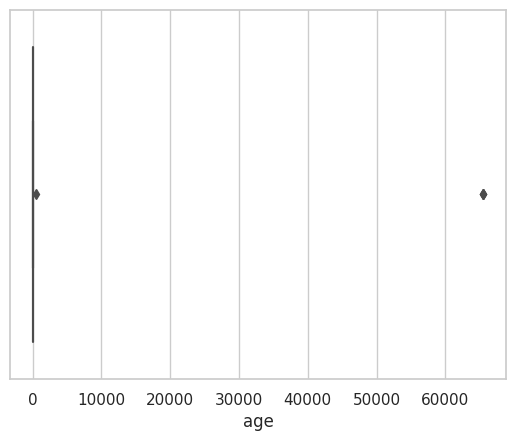

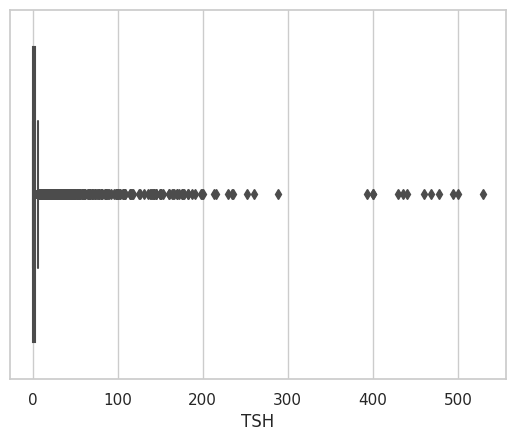

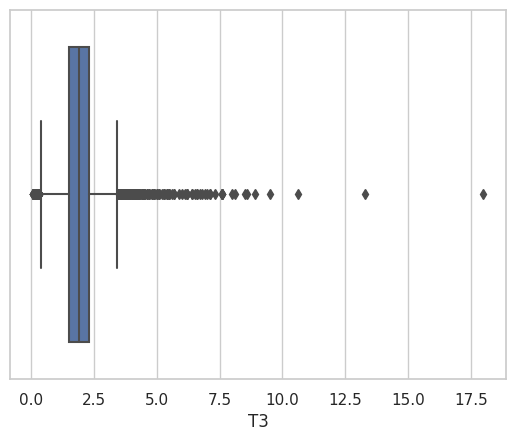

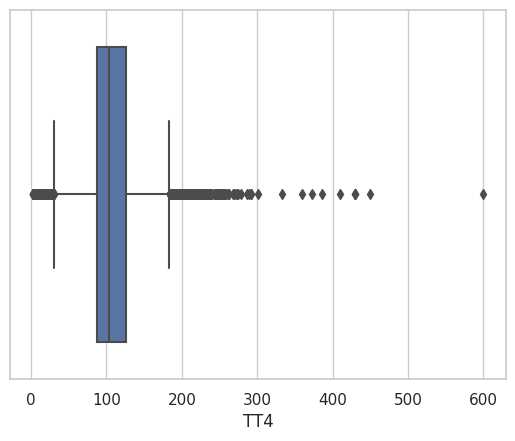

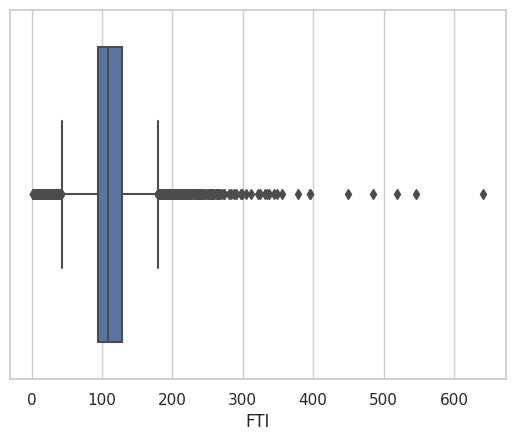

In [ ]:
#Crar boxplot para las variables numéricas
df_num = df_dropped[["age", "TSH", "T3","TT4", "FTI"]]
columnas_num = df_num.columns.tolist()

for columna in columnas_num:
    sns.set(style="whitegrid")
    sns.boxplot(x=df_dropped[columna])
    plt.show()


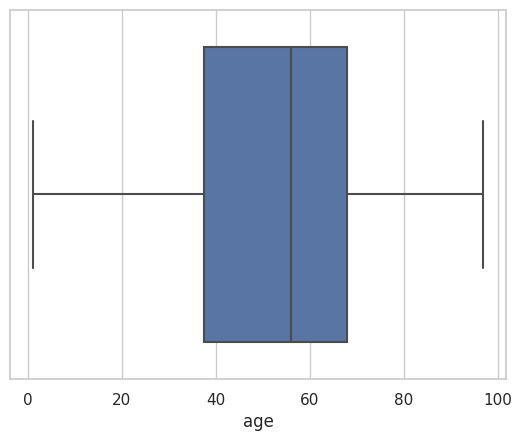

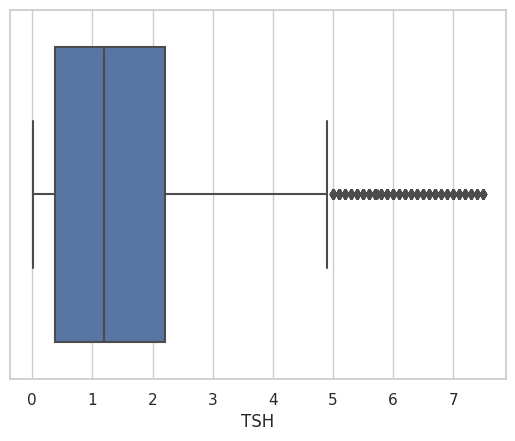

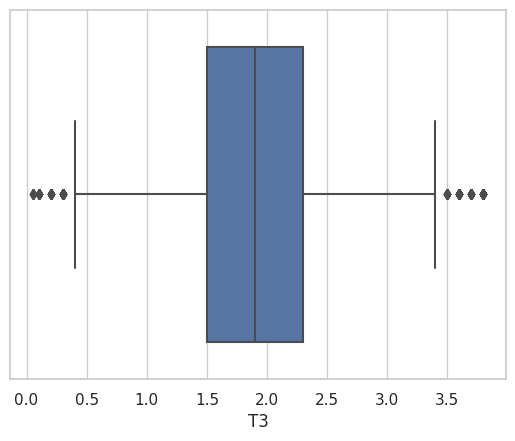

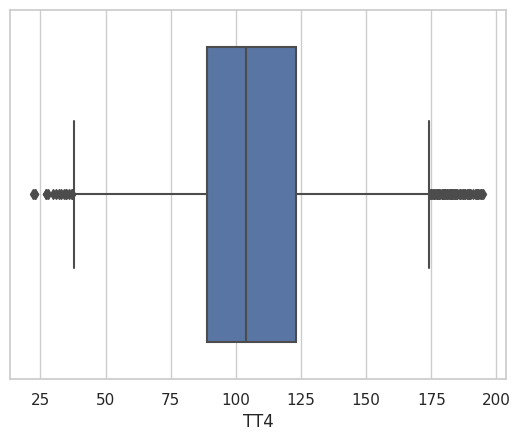

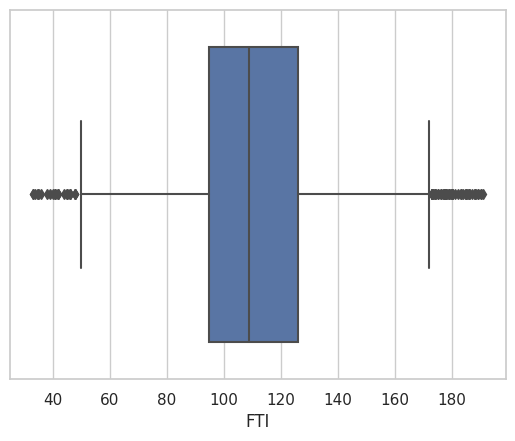

In [ ]:
# eliminación de outliers

for name in columnas_num:

  # Calcular el rango intercuantílico

  q1 = df_dropped[name].quantile(0.20)
  q2 = df_dropped[name].quantile(0.80)

  iqr = q2 - q1

  limite_inferior = q1 - (1.5 * iqr)
  limite_superior = q2 + (1.5 * iqr)


  filtro_inferior = df_dropped[name] > limite_inferior
  filtro_superior = df_dropped[name] < limite_superior

  df_dropped = df_dropped[(filtro_inferior) & (filtro_superior)]
  sns.set(style="whitegrid")
  sns.boxplot(x=df_dropped[name])
  plt.show()
  print("\n")


In [ ]:
# verificamos valores NaN
df_dropped.isna().sum()

age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
I131_treatment         0
lithium                0
goitre                 0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    2
FTI                    0
target                 0
patient_id             0
dtype: int64

In [ ]:
# Dropeamos los registroes que tienen NaN
Data = df_dropped.dropna(subset='T4U')
Data = Data.reset_index(drop=True)

In [ ]:
Data.isna().sum()

age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
I131_treatment         0
lithium                0
goitre                 0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
patient_id             0
dtype: int64

In [ ]:
Data.shape

(5037, 18)

In [ ]:
Data['age'].min()

1

In [ ]:
Data[['age','TSH','T3','TT4','T4U','FTI']].describe()

,age,TSH,T3,TT4,T4U,FTI
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,53.808219,1.596551,1.892654,106.495136,0.966131,111.370062
std,18.772988,1.509589,0.614002,26.636252,0.178263,24.799170
min,1.000000,0.005000,0.050000,23.000000,0.170000,33.000000
25%,38.000000,0.400000,1.500000,89.000000,0.860000,95.000000
50%,57.000000,1.200000,1.900000,104.000000,0.960000,109.000000
75%,70.000000,2.200000,2.300000,122.000000,1.060000,126.000000
max,97.000000,7.500000,3.800000,194.000000,2.330000,191.000000


<Axes: >

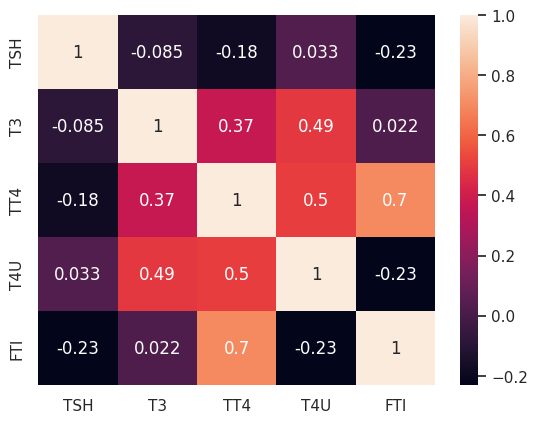

In [ ]:
sns.heatmap(Data[['TSH','T3', 'TT4', 'T4U', 'FTI']].corr(), annot=True)

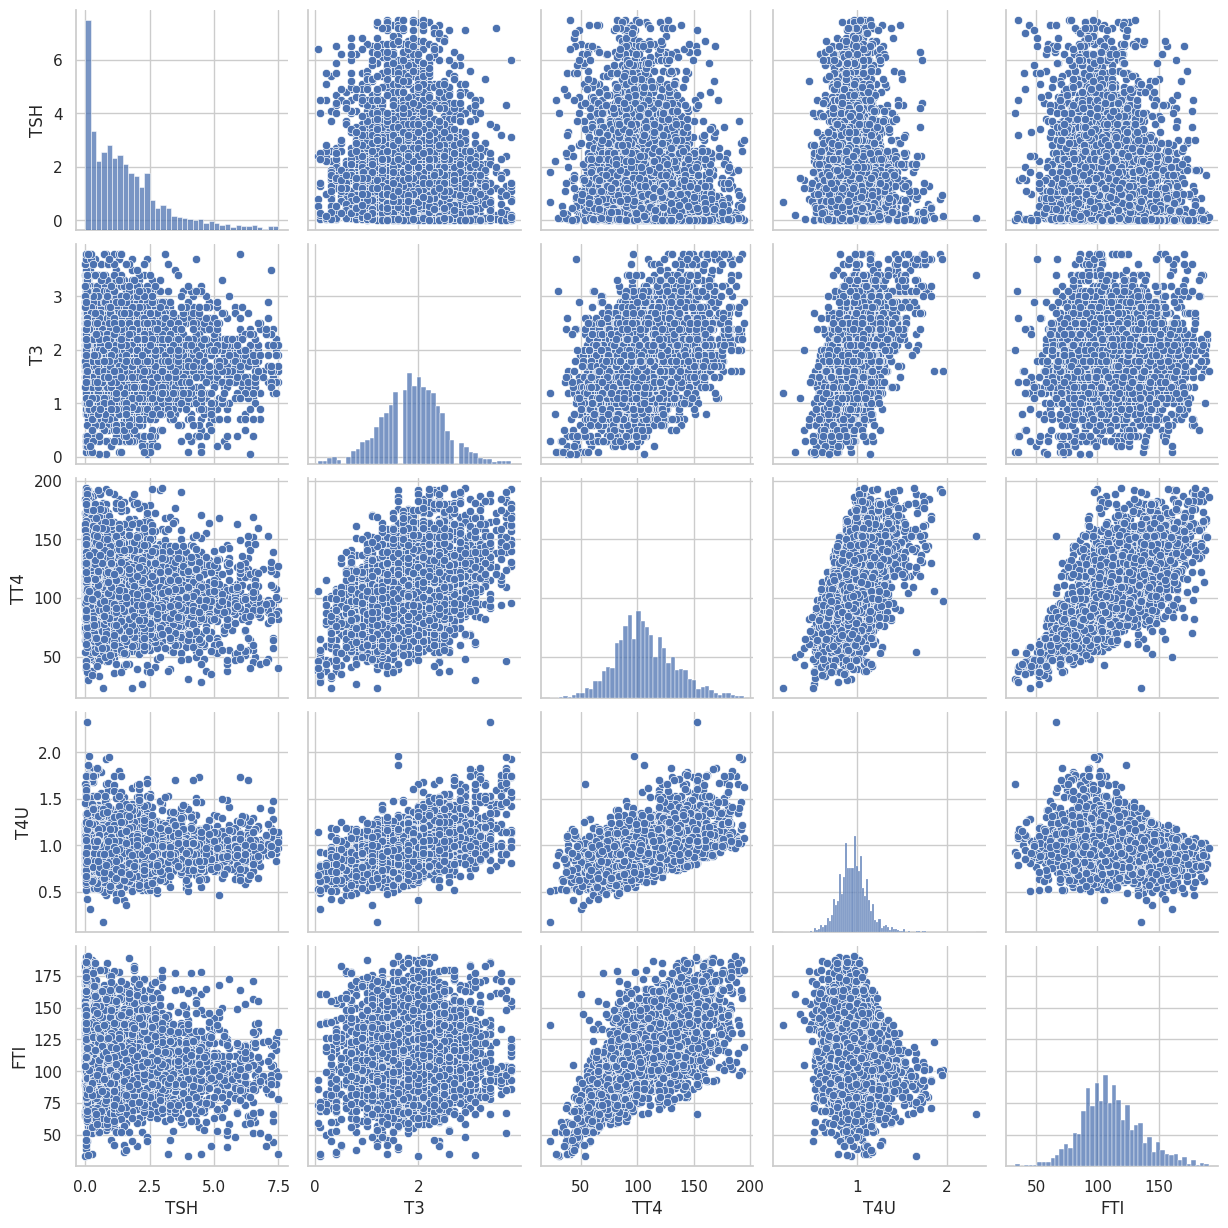

In [ ]:
sns.pairplot(Data[['TSH','T3', 'TT4', 'T4U', 'FTI']])

### Dataset procesado

In [ ]:
Data

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,I131_treatment,lithium,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,patient_id
0,36,F,0,0,0,0,0,0,0,0,0,1.50,2.4,90.0,1.06,85.0,NA,840815068
1,40,F,0,0,0,0,0,0,0,0,0,1.20,2.3,104.0,1.08,96.0,NA,840816001
2,40,F,0,0,0,0,0,0,0,0,0,5.90,2.1,88.0,0.84,105.0,NA,840816002
3,77,F,0,0,0,0,0,0,0,0,0,0.05,2.4,107.0,1.13,95.0,NA,840816003
4,51,F,0,0,0,0,0,0,0,0,0,0.05,2.1,93.0,0.87,106.0,NA,840816007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,42,F,0,0,0,0,0,0,0,0,0,0.89,2.1,114.0,1.04,110.0,NA,870114040
5033,65,M,0,0,0,0,0,0,0,0,0,0.73,1.8,85.0,0.90,94.0,NA,870114044
5034,65,F,1,0,0,0,1,0,0,0,0,4.10,2.1,135.0,1.19,113.0,NA,870114045
5035,42,F,1,0,0,0,0,0,0,0,0,2.30,1.3,59.0,0.73,81.0,NA,870115033


## Separación del Data Set en Entrenamiento y Prueba

In [ ]:
# Importar librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Crear variables x (todas las columnas menos la objetivo) y variable y (columna objetivo)
#Se aplicó el método get_dummies para poder aplicar los modelos conservando la variable sex que es string
x= Data.drop(["target", "patient_id"], axis=1)
x= pd.get_dummies(x)
y=Data["target"]

In [ ]:
#Separar el dataset en entrenamiento y prueba
#20% test y 80% entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##APLICACIÓN DE MODELOS DE MACHINE LEARNING

La naturaleza de este dataset, teniendo ya una variable definida como target, genera la hipótesis de que puede ser utilizado en algoritmos de clasificaicón de Machine Learning, en el cual se pueda predecir, a partir de ciertos valores de hormonas tiroideas, la patología en el paciente.

El modelo de regresión lineal se descartó desde un inicio, porque la variable Y es una variable categórica. En su lugar se consideraron los siguientes modelos

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

y_pred_nb = NaiveBayes.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Precisión del modelo con Naive Bayes: {accuracy_nb}")

Precisión del modelo con Naive Bayes: 0.07341269841269842


## Random Forest

ENTRENAR EL MODELO CON RANDOM FOREST
- VARIABLE Y: TARGET --> Concer el diagnóstico del paciente en términos de tiroides
- VARIABLE X: Todas las demás columnas del dataframe

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid Search
# - n_estimators
#max_depth
#Se aplicó Grid Search para encontrar los valores ideales para los hipermarametros de número de estimadores y la profundidad máxima al correr el Random Forest
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Mejor número de estimadores (n_estimators):", grid_search.best_params_['n_estimators'])
print("Mejor profundidad máxima (max_depth):", grid_search.best_params_['max_depth'])
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(x_test, y_test)
print("Precisión en el conjunto de prueba con el mejor número de estimadores:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor número de estimadores (n_estimators): 50
Mejor profundidad máxima (max_depth): 20
Precisión en el conjunto de prueba con el mejor número de estimadores: 0.9375


In [ ]:
#Entrenar el modelo con Random Forest
rf = RandomForestClassifier(n_estimators=50,max_depth=20, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

In [ ]:
#Sacar las predicciones
y_pred_rf = rf.predict(x_test)

In [ ]:
#Se obtuvo la medida de accuracy para el modelo de Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo con Random Forest: {accuracy_rf}")

Precisión del modelo con Random Forest: 0.9375


## Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")
param_grid = {
    'C': [1, 10, 100, 1000],
    'penalty': ['l1', 'l2','elasticnet'],
    'max_iter':[100,200,500,800],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg = LogisticRegression(random_state=43)
grid_search = GridSearchCV(log_reg, param_grid, cv=4, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(x_test)
print(grid_search.best_params_)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
{'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
print("Accuracy Logistic Regression: ",accuracy_score(y_test, y_pred))

Accuracy Logistic Regression:  0.9718462371413102


##Support Vector Machine

In [ ]:
#Se crea copia de Dataset para manipularlo
Data2=Data.copy()

In [ ]:
#Se convierten valores de columna "sex" a numeros
Data2['sex'] = Data['sex'].replace({'M': 1, 'F': 0})

In [ ]:
Data2.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,I131_treatment,lithium,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target,patient_id
0,36,0,0,0,0,0,0,0,0,0,0,1.50,2.4,90.0,1.06,85.0,NA,840815068
1,40,0,0,0,0,0,0,0,0,0,0,1.20,2.3,104.0,1.08,96.0,NA,840816001
2,40,0,0,0,0,0,0,0,0,0,0,5.90,2.1,88.0,0.84,105.0,NA,840816002
3,77,0,0,0,0,0,0,0,0,0,0,0.05,2.4,107.0,1.13,95.0,NA,840816003
4,51,0,0,0,0,0,0,0,0,0,0,0.05,2.1,93.0,0.87,106.0,NA,840816007


In [ ]:
Data2.shape

(5037, 18)

In [ ]:
#Se eliminan aquellos que no aportan informacion sobre la tiroides directamente, se dejan aquellos que hablan de Hipotiroidismo, hipertiroidismo y negativo.
Data2 = Data2[Data2['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', 'NA'])]

In [ ]:
Data2['target'].unique()

array(['NA', 'AK', 'C|I', 'H|K', 'A', 'G', 'F', 'B', 'C', 'GK', 'GI',
       'FK'], dtype=object)

In [ ]:
#Se renombran las letras para identificar Hipotiroidismo, hipertiroidismo y negativo.
diagnostico = {'NA': 'diagnostico_negativo',
               'A':'Hipertiroidismo',
               'AK':"Hipertiroidismo",
               'B':"Hipertiroidismo",
               'C':"Hipertiroidismo",
               'C|I': 'Hipertiroidismo',
               'D':"Hipertiroidismo",
               'D|R':"Hipertiroidismo",
               'E': "Hipotiroidismo",
               'F': "Hipotiroidismo",
               'FK': "Hipotiroidismo",
               "G": "Hipotiroidismo",
               "GK": "Hipotiroidismo",
               "GI": "Hipotiroidismo",
               'GKJ': 'Hipotiroidismo',
               'H|K': 'Hipotiroidismo'}

Data2.loc[:, 'target'] = Data2['target'].map(diagnostico)

In [ ]:
Data2['target'].unique()

array(['diagnostico_negativo', 'Hipertiroidismo', 'Hipotiroidismo'],
      dtype=object)

In [ ]:
#Revision de total de valores por diagnostico
Data2['target'].value_counts()

diagnostico_negativo    4104
Hipotiroidismo            80
Hipertiroidismo           48
Name: target, dtype: int64

In [ ]:
#Se seleccionan columnas criticas correlacionadas con el diagnostico de la enfermeda.
columns = ['age', 'sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant', 'target']
Data2 = Data2[columns]

In [ ]:
xa = Data2.iloc[:, :-1]
ya = Data2.iloc[:,-1]

In [ ]:
#Modelo con kernel lineal (Entrenamienti y prueba)
from sklearn.model_selection import train_test_split
xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xa_train = sc.fit_transform(xa_train)
xa_test = sc.transform(xa_test)

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(xa_train, ya_train)

SVC(kernel='linear')

In [ ]:
#Revision de rendimiento del modelo
print(SVM.score(xa_train, ya_train))


0.9831610044313146


In [ ]:
#Revision de precision del modelo
print(SVM.score(xa_test, ya_test))

0.987012987012987


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

ya_pred = SVM.predict(xa_test)

print(confusion_matrix(ya_test, ya_pred))
print(classification_report(ya_test, ya_pred))

[[  2   0   3]
 [  0  18   2]
 [  2   4 816]]
                      precision    recall  f1-score   support

     Hipertiroidismo       0.50      0.40      0.44         5
      Hipotiroidismo       0.82      0.90      0.86        20
diagnostico_negativo       0.99      0.99      0.99       822

            accuracy                           0.99       847
           macro avg       0.77      0.76      0.76       847
        weighted avg       0.99      0.99      0.99       847



## Validacion Cruzada

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

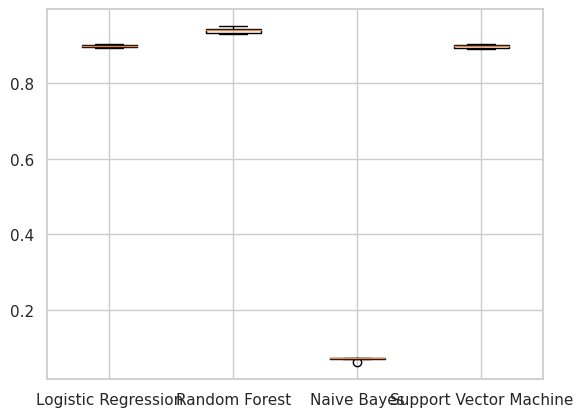

In [ ]:
models = {"Logistic Regression": LogisticRegression(C= 100, max_iter= 200, penalty= 'l2', solver= 'newton-cg'),
              "Random Forest": best_rf, "Naive Bayes": NaiveBayes, "Support Vector Machine": SVM}
results = []
for model in models.values():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    kf = KFold(n_splits=5, random_state=43, shuffle=True)

    cv_results = cross_val_score(model, x_train, y_train, cv=kf,n_jobs=-1,scoring='accuracy')
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

## Redes Neuronales

In [ ]:
# Importamos las librerias requeridas
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Creamos una copia del dataframe base
df_redes = Data.copy()
# Quitamos la columna que no contribuye al modelo
df_redes.drop(['patient_id'], axis=1, inplace=True)

In [ ]:
df_redes['target'].unique()

array(['NA', 'AK', 'R', 'N', 'M', 'K', 'I', 'L', 'J', 'C|I', 'O', 'H|K',
       'A', 'KJ', 'G', 'P', 'F', 'B', 'C', 'GK', 'MK', 'GI', 'Q', 'FK'],
      dtype=object)

#### Podemos visualizar que nuestra variable objetivo ('target') tiene muchas posibilidades de diagnostico, en el modelo de redes neuronales esto crea problemas, por lo que reduciremos las posibilidades en la variable objetivo con forme al contexto del dataset

In [ ]:

df_redes = df_redes[df_redes['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', 'NA'])]
df_redes['target'].unique()
dfr_y = df_redes[df_redes.columns[-1]]

In [ ]:
dfr_y.unique()

array(['NA', 'AK', 'C|I', 'H|K', 'A', 'G', 'F', 'B', 'C', 'GK', 'GI',
       'FK'], dtype=object)

In [ ]:
### Se realiza un mapeo para reducir aun mas las posibilidades de predicciones
mapping = {'NA' :"Negative", 'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid'}
dfr_y = dfr_y.map(mapping)
dfr_y

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
5032    Negative
5033    Negative
5034    Negative
5035    Negative
5036    Negative
Name: target, Length: 4232, dtype: object

#### Nos quedaremos solo con nuestros 3 posibles valores

In [ ]:
dfr_y.unique()

array(['Negative', 'Hyperthyroid', 'Hypothyroid'], dtype=object)

#### Preparamos nuestras variables para que puedan ser procesadas

In [ ]:
# Eliminamos de la variable X la variable Y
dfr_x = df_redes.drop(['target'], axis=1)
# Convertimos nuestra columna categorica 'sex' en dos numericas.
dfr_x = pd.get_dummies(dfr_x)

In [ ]:
# Convertimos la variable dependiente a numerica
dfr_y.replace({'Negative': 0 , 'Hyperthyroid': 1, 'Hypothyroid':2}, inplace=True)

In [ ]:
idx, c = np.unique(dfr_y, return_counts=True)

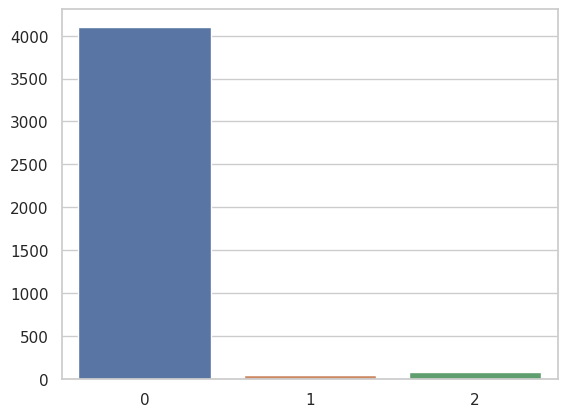

In [ ]:
sns.barplot(x=idx, y=c);

#### Note que tenemos datos muy disparejos, esto puede representar un sesgo extremadamente importante, por lo que se usara over_sampling para tratar de eliminar el sesgo

In [ ]:
X_resampled, Y_resampled = SMOTE(random_state=42).fit_resample(dfr_x,dfr_y)

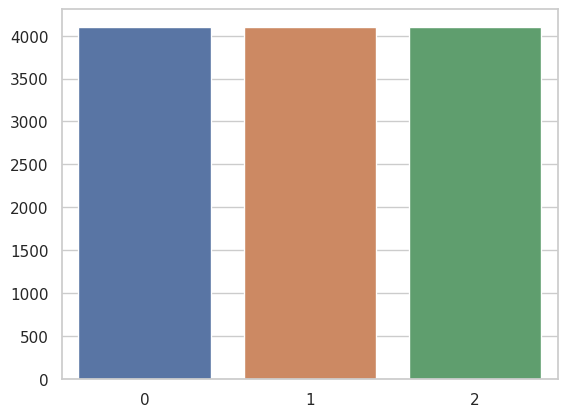

In [ ]:
idx, c = np.unique(Y_resampled, return_counts=True)
sns.barplot(x=idx, y=c);

In [ ]:
### Se realizan las particiones
x_train, x_test, y_train, y_test = train_test_split(X_resampled.values, Y_resampled.values, test_size=0.3, random_state=42)
print(f"X Train shape: {x_train.shape}, Y Train shape: {y_train.shape} X test shape {x_test.shape} Y test Shape {y_test.shape}")

X Train shape: (8618, 17), Y Train shape: (8618,) X test shape (3694, 17) Y test Shape (3694,)


In [ ]:
### Procedemos a normalizar nuestros datos de X
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
### Comenzamos a modelar
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(64, activation='relu'),     # Capa oculta con 64 neuronas y función de activación ReLU
    tf.keras.layers.Dense(32, activation='relu'),     # Capa oculta con 32 neuronas y función de activación ReLU
    tf.keras.layers.Dense(3, activation='softmax')    # Capa de salida con 3 neuronas (clases) y función de activación softmax
])

In [ ]:
model.summary() ## Para visualizar el estado del modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3331 (13.01 KB)
Trainable params: 3331 (13.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### Compilamos y optimizamos el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=75, batch_size=32, validation_split=0.2) # Entrenar el modelo

Epoch 1/75
216/216 [==============================] - 2s 5ms/step - loss: 0.3409 - accuracy: 0.8980 - val_loss: 0.1053 - val_accuracy: 0.9704
Epoch 2/75
216/216 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9682 - val_loss: 0.0674 - val_accuracy: 0.9820
Epoch 3/75
216/216 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9764 - val_loss: 0.0615 - val_accuracy: 0.9838
Epoch 4/75
216/216 [==============================] - 1s 4ms/step - loss: 0.0628 - accuracy: 0.9816 - val_loss: 0.0337 - val_accuracy: 0.9919
Epoch 5/75
216/216 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9846 - val_loss: 0.0359 - val_accuracy: 0.9930
Epoch 6/75
216/216 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9878 - val_loss: 0.0266 - val_accuracy: 0.9925
Epoch 7/75
216/216 [==============================] - 1s 5ms/step - loss: 0.0404 - accuracy: 0.9893 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = [tf.argmax(pred).numpy() for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

116/116 [==============================] - 0s 2ms/step
Precisión del modelo: 99.32%


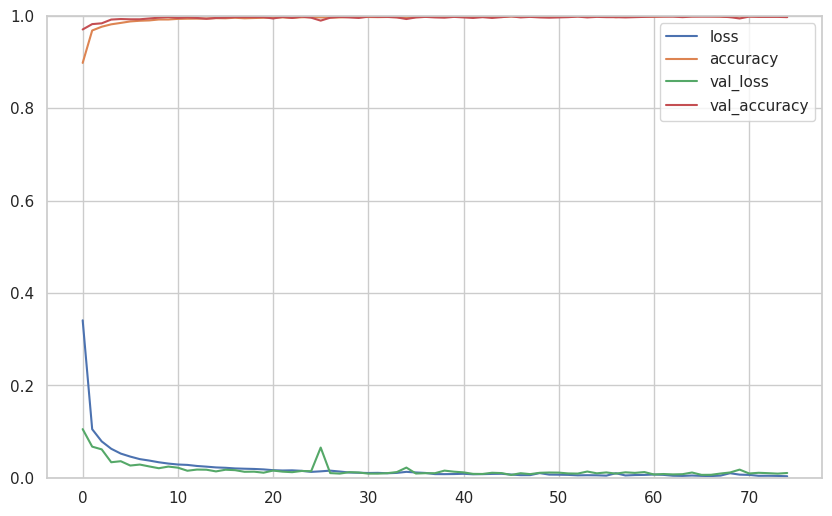

In [ ]:
### Para visualizar el comportamiento del modelo y las metricas definidas
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
### Creamos la matriz de confusion para encontrar evaluar el modelo
matriz_confusion = confusion_matrix(y_test, y_pred_classes)

In [ ]:
# Calcular precisión, sensibilidad y especificidad
precision = matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[0, 1])
sensibilidad = matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[1, 0])
especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
# Calcular F1-score
f1_score = 2 * (precision * sensibilidad) / (precision + sensibilidad)


print(f"La precision del modelo es: {precision}\nLa sensibilidad del modelo es: {sensibilidad}\nLa especificidad del modelo es: {especificidad}\nLa exactitud del modelo es: {accuracy}\nEl F1 Score del modelo es: {f1_score}")

La precision del modelo es: 0.9928741092636579
La sensibilidad del modelo es: 0.9968203497615262
La especificidad del modelo es: 0.9926888708367181
La exactitud del modelo es: 0.9932322685435842
El F1 Score del modelo es: 0.9948433161443871


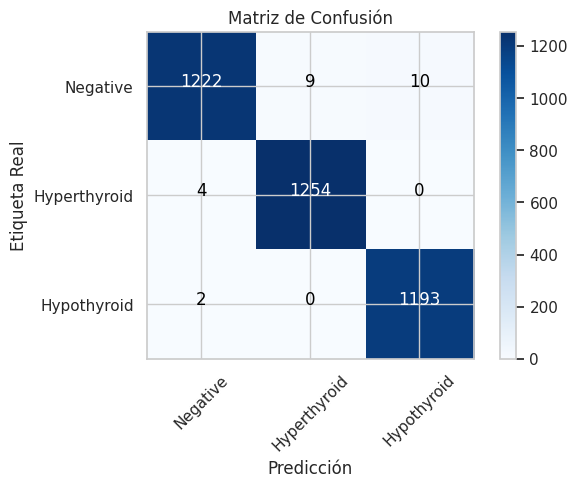

In [ ]:
### Visualizar la matriz de confusion
plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Etiquetas de los ejes
clases =['Negative', 'Hyperthyroid', 'Hypothyroid']
tick_marks = np.arange(len(clases))
plt.xticks(tick_marks, clases, rotation=45)
plt.yticks(tick_marks, clases)

# Anotar los valores en la matriz de confusión
thresh = matriz_confusion.max() / 2.
for i in range(matriz_confusion.shape[0]):
    for j in range(matriz_confusion.shape[1]):
        plt.text(j, i, str(matriz_confusion[i, j]), horizontalalignment="center"
        ,color="white" if matriz_confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

## K-means

La aplicación del modelo de redes neuronales se realizó aplicando una limpieza de dataset un poco diferente al resto de los modelos.
La variable objetivo Y se agrupó en únicamente 3 diferentes opciones posibles:
- Negative
- Hipotiroidismo
- Hipertiroidismo

Haciendo esta modificación al dataset se obtuvo lo siguiente

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Normalización de datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Calcular la inercia para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

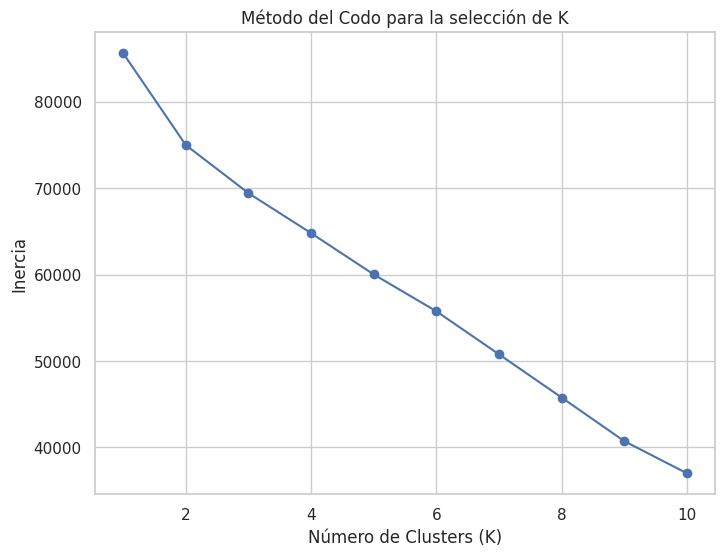

In [ ]:
# Graficar la inercia en función de K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para la selección de K')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la diferencia entre la inercia de dos clusters adyacentes
diff_inertia = np.diff(inertia)

# Calcular la segunda derivada para encontrar el codo
second_derivative = np.diff(diff_inertia)

# Encontrar el índice del codo
codo_index = np.argmax(second_derivative) + 1  # Sumamos 1 para tener en cuenta el desplazamiento por las diferencias

# El número óptimo de clusters es el índice del codo
optimal_k = codo_index + 1  # Sumamos 1 nuevamente para obtener el número real de clusters

print("Número óptimo de clusters (según el codo):", optimal_k)

Número óptimo de clusters (según el codo): 2


In [ ]:
# Elegir el número de clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Cambia el número de clusters según sea necesario
kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Obtener las etiquetas de los clusters para los datos de entrenamiento y prueba
train_cluster_labels = kmeans.predict(x_train)
test_cluster_labels = kmeans.predict(x_test)

In [ ]:
# Evaluar el modelo usando Silhouette Score
train_silhouette_score = silhouette_score(x_train, train_cluster_labels)
test_silhouette_score = silhouette_score(x_test, test_cluster_labels)

print("Silhouette Score en el conjunto de entrenamiento:", train_silhouette_score)
print("Silhouette Score en el conjunto de prueba:", test_silhouette_score)

Silhouette Score en el conjunto de entrenamiento: 0.20557566113147288
Silhouette Score en el conjunto de prueba: 0.19958399340637265


##Conclusiones

En general, los modelos usaron como variable dependiente una variable categórica lo cual delimitó el análisis a ciertos modelos de Machine Learning.
En el análisis del dataset se pudieron ocupar 6 algoritmos,  para determinar la relación entre target con las diferentes condiciones que se ocuparon como variable independiente.

En conclusión, cada algoritmo presentó sus ventajas y áreas de oportunidad, a continuación se enlistan sus precisiones:
- Random Forest: 0.9375
- Support Vector Machine: 0.9870
- Regresión Logística: 0.893
- Redes Neuronales: 0.995
- K-means: 0.1995

Es así que el algoritmo de redes neuronales, resultó ser un modelo ídoneo para determinar las alteraciones tiroidales en función de las diferentes columnas que se ocuparon de variable independiente, usando un oversampling se pudieron obtener los datos que el dataset no registró de manera explícita.